## Resources:
* https://github.com/mwouts/itables?ref=pythonrepo.com | itables
* https://dash.plotly.com/reference | Dash api
* https://docs.bokeh.org/en/latest/docs/first_steps/first_steps_1.html | Bokeh
* https://github.com/ResidentMario/missingno | Missingno
* https://pypi.org/project/html-to-json/ | Html to Json
* https://colab.research.google.com/github/vopani/datatableton/blob/main/notebooks/01_datatable_introduction_solutions.ipynb#scrollTo=b5a9e1bf | Datableton

In [ ]:
! pip install dash   
! pip install dash-html-components                                         
! pip install dash-core-components                                     
! pip install plotly
! pip install bokeh
! pip install missingno

In [ ]:
!pip install itables

In [ ]:
!pip install pandas==1.3.3
!pip install  pandas_profiling==3.0.0
!pip install pyyaml==5.4.1
!pip install xmltojson
!pip install xmltodict
!pip install html-to-json

In [ ]:
!python3 -m pip install -U datatable

In [ ]:
!pip install pyarrow

In [ ]:
!pip install great_expectations


In [5]:
import pandas as pd
import numpy as np

import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px

from bokeh.plotting import figure, show

import missingno as msno

#from itables import init_notebook_mode
#from itables import show

from pandas.api.types import is_datetime64_any_dtype as is_datetime

from pandas.errors import ParserError

from html.parser import HTMLParser

from pandas_profiling import ProfileReport

from bs4 import BeautifulSoup as bs

#import xmltojson
import xmltodict, json

from lxml import etree

import html_to_json

import great_expectations

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Read Data

In [6]:
#kaggle datasets download -d sinatavakolibanizi/samsung-aftersales-service-in-iran

In [7]:
df = pd.read_csv('samdata.csv')
df.head()

,No,Service_type,Cost_Type,Product_Group,Serial_No,City,Product_Date,Receipt_Date,Appoint_Date,Complete_Date,TAT01,TAT02,Job_Satus,Defect_Des,Symptom_Desc,Repair_Action_Desc,Labor_Charge_Desc,Engineer,Labor_Charge_Amount,Parts_Amount,Discount_Amount,Total_Invoice_Amount
0,1,0,Normal Warranty,AUDIO - HOME THEAT,2F/LAHFZ7E-IP-X,Tehran,NaN,2/5/2012,2/5/2012,1/21/2013,0,351,0,WORN-OUT,OTHER PROBLEMS,SOFTWARE UPGRADE,Free Of Charge,Tech15,0,0.00,0.000,0.000
1,2,1,Normal Warranty,REFRIGERATOR-SBS,AIP244AACA/4E7,Tehran,NaN,7/7/2012,9/10/2012,1/31/2013,65,208,1,SHORT,OTHER PROBLEMS,OTHER REPAIR,Free Of Charge,Tech03,0,3437481.60,687486.320,2748885.280
2,3,1,Normal Warranty,REFRIGERATOR-SBS,JK-C4BBCAEKL72,Tehran,NaN,7/7/2012,8/15/2012,1/31/2013,38,208,1,OPEN,OTHER PROBLEMS,OTHER REPAIR,Free Of Charge,Tech03,0,4228756.56,845751.312,3383005.248
3,4,0,Out of Warranty,MONITOR - TFT LCD,IP2JO4/-A-47,Tehran,NaN,8/7/2012,8/7/2012,1/13/2013,0,158,1,WORN-OUT,OTHER PROBLEMS,ELECTRICAL PARTS REPLACEMENT,Free Of Charge,Tech15,0,0.00,0.000,0.000
4,5,0,Out of Warranty,AUDIO - MP3 Player,AU/BCQE2A/P,Tehran,NaN,8/7/2012,8/9/2012,1/7/2013,2,153,1,WORN-OUT,OTHER PROBLEMS,SOFTWARE UPGRADE,Medium,Tech07,120000,765488.60,177087.820,708381.680


In [8]:
[column for column in df.columns if is_datetime(df[column])]

[]

In [9]:

def is_datetime_df(df):
  dt_column = []
  for c in df.columns[df.dtypes=='object']: #don't cnvt num
      try:
          df[c]=pd.to_datetime(df[c])
          dt_column.append(C)
      except Exception as khar: #Can't cnvrt some
          print(khar)
          pass # ...so leave whole column as-is unconverted
      
  return df,dt_column

In [10]:
df , date_time_detected_column = is_datetime_df(df)

Unknown string format: Normal Warranty
Unknown string format: AUDIO - HOME THEAT
Unknown string format: 2F/LAHFZ7E-IP-X
Unknown string format: Tehran
name 'C' is not defined
name 'C' is not defined
name 'C' is not defined
Unknown string format: WORN-OUT
Unknown string format: OTHER PROBLEMS
Unknown string format: SOFTWARE UPGRADE
Unknown string format: Free Of Charge
Unknown string format: Tech15


In [11]:
date_time_detected_column

[]

In [12]:
type(df['Appoint_Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.describe()

,No,Service_type,Product_Date,TAT01,TAT02,Job_Satus,Labor_Charge_Amount,Parts_Amount,Discount_Amount,Total_Invoice_Amount
count,3136.000000,3136.000000,724.000000,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3.136000e+03,3.136000e+03
mean,1568.500000,0.105230,39227.758287,1.289222,6.647959,0.977360,129877.232143,2.303481e+06,4.844214e+05,1.924006e+06
std,905.429548,0.306898,1152.746282,5.060422,14.012700,0.148778,176843.065376,6.682868e+06,1.349372e+06,5.400547e+06
min,1.000000,0.000000,33870.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,784.750000,0.000000,38451.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1568.500000,0.000000,38823.000000,0.000000,3.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2352.250000,0.000000,40188.000000,1.000000,6.000000,1.000000,250000.000000,7.510464e+04,8.738318e+04,3.827746e+05
max,3136.000000,1.000000,40813.000000,81.000000,351.000000,1.000000,540000.000000,4.480716e+07,8.088432e+06,3.635773e+07


## Table

In [ ]:
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [ ]:
vc = {}
for column in df.columns:
  if df[column].dtypes==object  :
    vc[column] = df[column].value_counts()
  else:
    vc[column] = 'numeric'
#df_vc = pd.DataFrame.from_dict(vc,orient='index')


In [ ]:
vc

In [ ]:
nu = {}
for column in df.columns:
  nu[column] = df[column].nunique()
df_nu = pd.DataFrame.from_dict(nu,orient='index')
dt_nu = pd.merge(pd.DataFrame(df.dtypes),df_nu,on=df_nu.index)
dt_nu = dt_nu.set_index('key_0')
dt_nu.columns = ['dtypes','number_of_unique_values']
show(dt_nu)

Loading... (need help?)


In [ ]:
skew = {}
for column in df.describe().columns:
  skew[column] = df[column].skew()
df_skew = pd.DataFrame.from_dict(skew,orient='index')
df_skew.columns = ['Skewness']
Kurt = {}
for column in df.describe().columns:
  Kurt[column] = df[column].kurt()
df_Kurt = pd.DataFrame.from_dict(Kurt,orient='index')
df_Kurt.columns = ['Kurtosis']

show(pd.concat([df.describe(),df_skew.transpose(),df_Kurt.transpose()]))

Loading... (need help?)


In [ ]:
df.feature_stat()

AttributeError: ignored

## Missing Values

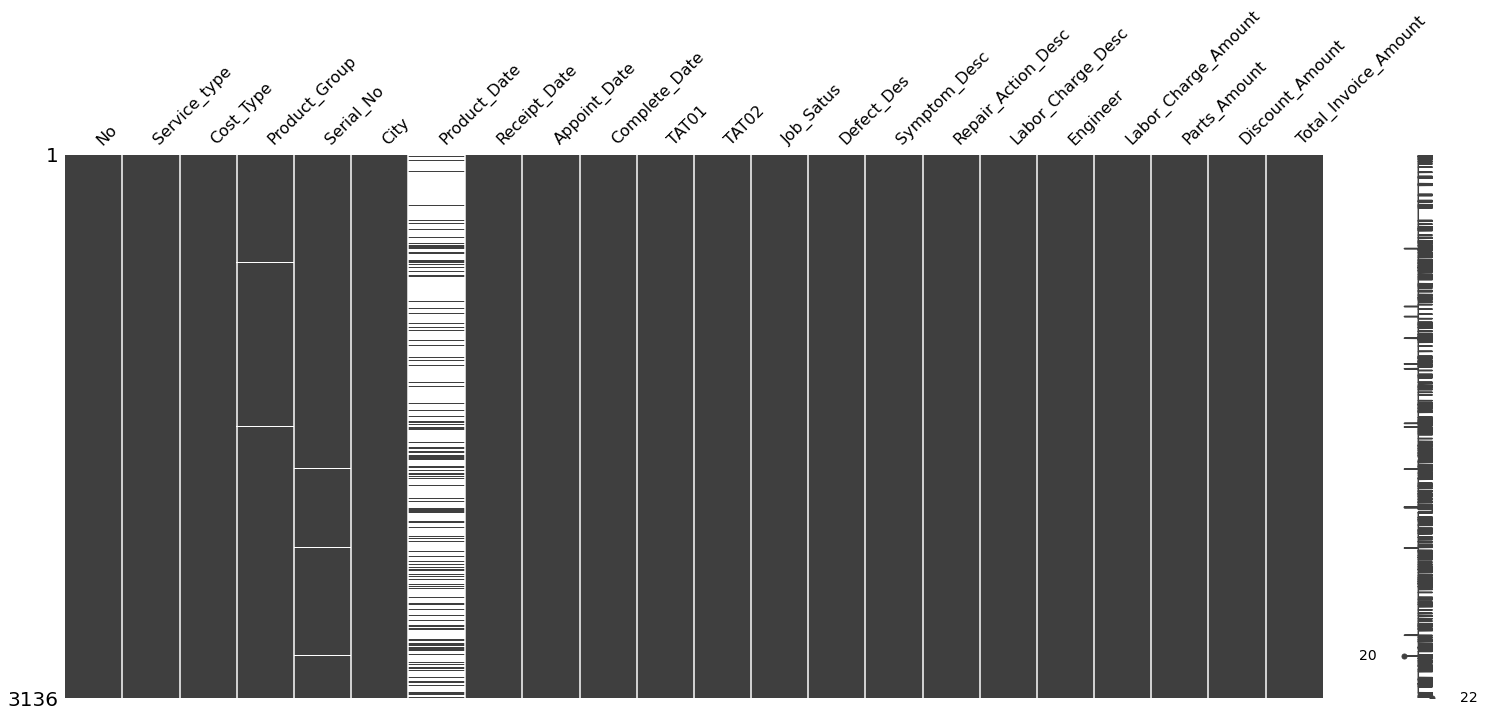

In [ ]:
msno.matrix(df)

## Functions

### Pandas-prifiling Functions

In [ ]:
def pandas_report(df, params='all', var_names=df.columns, first_rows=True):
  """
  takes a dataframe and returns its report
  param = {1:overview, 2:variables , 3:sample , 4:duplicates,all}
  var_names = list of variables of dataframe to be analyzed
  first_rows = True for 10 first rows and False for 10 last rows
  """
  report = ProfileReport(df)
  soup = bs(report.to_html(), 'html.parser')

  def get_overview():
    overview = soup.find(id="overview-dataset_overview")
    parse_overview = xmltodict.parse(str(overview))
    return json.dumps(parse_overview)

  def get_variable_statistics(var_name):
    div = soup.find_all("div", {"class": "variable"})
    for i in div:
      if i.p['title'] == var_name:
        parse_variable = html_to_json.convert(str(i))
        break
    #return json.dumps(parse_variable)
    return parse_variable

  def get_correlation():
    pass
  
  def get_sample(first_rows =True):
    #dict_sample= {}
    div = soup.find_all("div", {"class": "row spacing"})
    for i in div:
      if i.find('h2',{'class':'indent'}):
        if first_rows and i.find('h2',{'class':'indent'}).string == 'First rows':
          parse_sample = xmltodict.parse(str(i))

        if first_rows == False and i.find('h2',{'class':'indent'}).get_text() == 'Last rowshi' or i.find('h2',{'class':'indent'}).string =='Last rows':
          parse_sample = xmltodict.parse(str(i))
          # print('hello')

    return json.dumps(parse_sample)

  result = {}
  if params != 'all':
    for param in list(params):
      if param == 1:
        result['overview'] = get_overview()

      if param == 2:
        result['variables'] = [get_variable_statistics(var) for var in var_names]

      if param == 3:
        result['sample'] = get_sample(first_rows)
    return result
      #if param == 4:

  if params =='all':
      result['overview'] = get_overview()
      result['variables'] = [get_variable_statistics(var) for var in var_names]
      result['sample_first'] = get_sample(True)
      result['sample_last'] = get_sample(False)
  return result


In [ ]:
result = pandas_report(df,2,'No')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
df_n = pd.DataFrame.from_dict(result,orient='index')

In [ ]:
#name = soup.find(title="No").a['href'][1:]

In [ ]:
dom = etree.HTML(str(div))

In [ ]:
report = ProfileReport(df)
report.to_file('report2.html')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
for i in list([1,3,5]):
  print(i)

1
3
5


## Databelton
---

In [ ]:
import datatable as dt
import pyarrow as pa


In [ ]:
dt_f = dt.fread('samdata.csv')

In [ ]:
dt_f.to_pandas()

In [ ]:
list(df['No'].values)

In [ ]:
data = dt.Frame(col1 = list(df['No'].values))

In [ ]:
data

,col1
,▪▪▪▪▪▪▪▪
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [ ]:
data.head()

In [ ]:
def get_head_tail(dt, n, head=True):
  """
  takes n and head, returns first n rows with head =True or last n rows with head =False
  """
  if head:
    return dt.head(n)
  else:
    return dt.tail(n)


In [ ]:
def get_row_col(dt,row=True):
  """
  takes row, returns number of rows with rows =True and number of columns for rows =False
  """
  if row:
    return dt.nrows

  else:
    return dt.cols

In [ ]:
def get_columns_name(dt):
  return dt_f.names

In [ ]:
def get_columns_type(dt,column_name):
  dt_f[column_name].types[0].name  

In [ ]:
pa.Table.from_pandas(df)

pyarrow.Table
No: int64
Service_type: int64
Cost_Type: string
Product_Group: string
Serial_No: string
City: string
Product_Date: double
Receipt_Date: timestamp[ns]
Appoint_Date: timestamp[ns]
Complete_Date: timestamp[ns]
TAT01: int64
TAT02: int64
Job_Satus: int64
Defect_Des: string
Symptom_Desc: string
Repair_Action_Desc: string
Labor_Charge_Desc: string
Engineer: string
Labor_Charge_Amount: int64
Parts_Amount: double
Discount_Amount: double
Total_Invoice_Amount: double

In [ ]:
dt_f['Appoint_Date'].types[0].name

'str32'

<module 'datatable' from '/usr/local/lib/python3.7/dist-packages/datatable/__init__.py'>

## Pandas Functions

In [ ]:
def get_head_tail(df, n, head=True):
  """
  takes df:{dataframe or series} n:{int} and head:{True or False}, returns first n rows with head =True or last n rows with head =False
  """
  if head:
    return df.head(n)
  else:
    return df.tail(n)

def get_row_col(df,row=True):
  """
  takes df:{dataframe} row:{True or False}, returns number of rows with rows =True and number of columns for rows =False
  """
  if row:
    return len(df)

  else:
    return len(df.columns)

def get_columns_name(df):
  """
  takes df:{dataframe} and returns its column names
  """
  return df.columns

def get_columns_type(column_series):
  """
  takes column_series:{pandas series} and returns column's type
  """
  column_series.dtypes.name

def get_sorted_column(column_series,ascending=False):
  """
  takes column_series:{pandas series} and returns column{pandas series} sorted
  """
  column_series.sort_values(ascending=ascending)

def get_numeric_column_parameters(column_series,param='all'):
  """
  takes column_series:{pandas series},param:{count,sum,mean,median,min,max,mode,std,variance,skew,kurt,distinct,zeros,missing,all} and returns column's parameter
  """ 
  param_dict = {}

  if pd.api.types.is_numeric_dtype(column_series.dtypes):
    if param == 'count':
      return column_series.count()    
    if param == 'mean':
      return column_series.mean() 
    if param == 'sum':
      return column_series.sum()
    if param == 'median':
      return column_series.median()
    if param == 'min':
      return column_series.min()
    if param == 'max':
      return column_series.max()
    if param == 'mode':
      return column_series.mode()
    if param == 'std':
      return column_series.std()
    if param == 'variance':
      return column_series.var()
    if param == 'skew':
      return column_series.skew()
    if param == 'kurt':
      return column_series.kurt()
    if param == 'distinct':
      return column_series.nunique()
    if param == 'zeros':
      return sum(column_series==0)
    if param == 'missing':
      return sum(column_series.isnull()==True)

    if param == 'all':
      for i in ['count','sum','mean','median','min','max','mode','std','variance','skew','kurt','distinct','zeros','missing']:
        param_dict[i] = get_numeric_column_parameters(column_series,i)
      return param_dict

    else:
      print('not a valid param')

  else:
    print('not numeric column')

def get_n_min_max(column_series,largest=True,n=1):
  """
  takes column_series:{p.Series} largest:{True or False},n:{int} returns nlargest and nsmallest if largest is False
  """
  if largest:
    return column_series.nlargest(n)

  else:
    return column_series.nsmallest(n)



def get_object_column_parameters(column_series,param='all',n_most_repeated = 1):
  """
  takes column_series:{pandas series},param:{count,distinct,missing,n_most_repeated,max_length,min_length,all} and returns column's parameter
  """ 
  param_dict = {}

  if not pd.api.types.is_numeric_dtype(column_series.dtypes):
    if param == 'count':
      return column_series.count()    
    if param == 'min_length':
      return int(column_series.astype(bytes).str.len().min())
    if param == 'max_length':
      return int(column_series.astype(bytes).str.len().max())
    if param == 'n_most_repeated':
      return column_series.value_counts()[0:n_most_repeated]
    if param == 'distinct':
      return column_series.nunique()
    if param == 'missing':
      return sum(column_series.isnull()==True)

    if param == 'all':
      for i in ['count','distinct','missing','n_most_repeated','max_length','min_length']:
        param_dict[i] = get_object_column_parameters(column_series,i)
      return param_dict

    else:
      print('not a valid param')

  else:
    print('not numeric column')


def get_timeseries_column_parameters(column_series,param,n_most_repeated = 1):
  """
  takes column_series:{pandas series},param:{count,distinct,missing,n_most_repeated,max_length,min_length,all} and returns column's parameter
  """ 
  param_dict = {}

  try :
    column_series = pd.to_datetime(column_series)
    if not pd.api.types.is_numeric_dtype(column_series.dtypes):
      if param == 'count':
        return column_series.count()    
      if param == 'min_date':
        return  column_series.min()
      if param == 'max_date':
        return  column_series.max()

      # if param == 'min_repeated_year':
      #   return  column_series.astype(bytes).str.len().min()
      # if param == 'max_repeated_year':
      #   return  column_series.astype(bytes).str.len().max()
      if param == 'min_year':
        return  column_series.min().year
      if param == 'max_year':
        return  column_series.max().year


      # if param == 'min_repeated_month':
      #   return  column_series.astype(bytes).str.len().min()
      # if param == 'max_repeated_month':
      #   return  column_series.astype(bytes).str.len().max()
      if param == 'min_month':
        return  column_series.min().month
      if param == 'max_month':
        return  column_series.max().month


      if param == 'min_day':
        return column_series.min().day
      if param == 'max_day':
        return  column_series.min().day
      # if param == 'min_repeated_day':
      #   return  column_series.min().day
      # if param == 'max_repeated_day':
      #   return  column_series.max().day

      if param == 'n_most_repeated':
        return column_series.value_counts()[0:n_most_repeated]
      if param == 'distinct':
        return column_series.nunique()
      if param == 'missing':
        return sum(column_series.isnull()==True)

      if param == 'all':
        for i in ['count','distinct','missing','n_most_repeated','max_length','min_length']:
          param_dict[i] = get_object_column_parameters(column_series,i)
        return param_dict

      else:
        print('not a valid param')

    else:
      print('not numeric column')

  except:
    print('not detected date format')


def get_cov_corr(column_series,column_series2):
  """
  takes column_series:{pandas series},column_series:{pandas series} and returns cov,corr 
  """ 
  if pd.api.types.is_numeric_dtype(column_series.dtypes) and pd.api.types.is_numeric_dtype(column_series2.dtypes):
    return column_series.cov(column_series2),column_series.corr(column_series2)

def change_dtype(column_series,new_type):
  """
  takes column_series:{pandas series},new_type and changes the type of column_series and returns changed column_series
  """ 
  try:
    column_series = column_series.astype(new_type)

  except:
    print('type is not valid or not possible')


def get_dummies(column_series):
  """
   takes column_series:{pandas series} and returns a dummied dataframe
  """
  return pd.get_dummies(column_series)

In [ ]:
x = pd.to_datetime(df['Product_Date'])

In [ ]:
x.dropna.year

AttributeError: ignored

## Great Expectations

In [15]:
!great_expectations init


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
Using v3 (Batch Request) API

  ___              _     ___                  _        _   _
 / __|_ _ ___ __ _| |_  | __|_ ___ __  ___ __| |_ __ _| |_(_)___ _ _  ___
| (_ | '_/ -_) _` |  _| | _|\ \ / '_ \/ -_) _|  _/ _` |  _| / _ \ ' \(_-<
 \___|_| \___\__,_|\__| |___/_\_\ .__/\___\__|\__\__,_|\__|_\___/_||_/__/
                                |_|
             ~ Always know what to expect from your data ~

Let's create a new Data Context to hold your project configuration.

Great Expectations will create a new directory with the following structure:

    great_expectations
    |-- great_expectations.yml
    |-- expectations
    |-- checkpoints
    |-- plugins
    |-- .

In [16]:
!great_expectations datasource new



/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
Using v3 (Batch Request) API

What data would you like Great Expectations to connect to?
    1. Files on a filesystem (for processing with Pandas or Spark)
    2. Relational database (SQL)
: 1

What are you processing your files with?
1. Pandas
2. PySpark
: 1

Enter the path of the root directory where the data files are stored. If files are on local disk enter a path relative to your current working directory or an absolute path.
: /content/samdata.csv
Please install the optional dependency 'black' to enable linting. Returning input with no changes.
Because you requested to create a new Datasource, we'll open a notebook for you now to complete it!


Traceback (most r

In [ ]:
1